In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_excel(r"C:\Users\adars\Downloads\iris.xls")

In [3]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

## Filling the null values

In [7]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
col = ['SL', 'SW', 'PL']

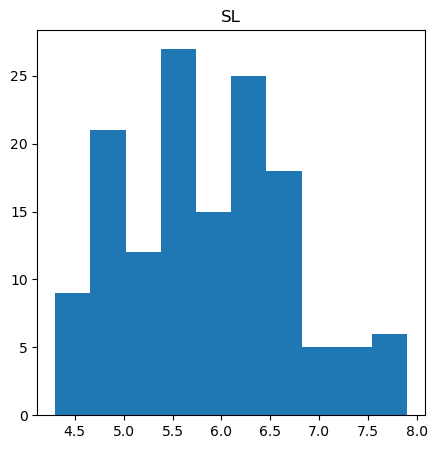

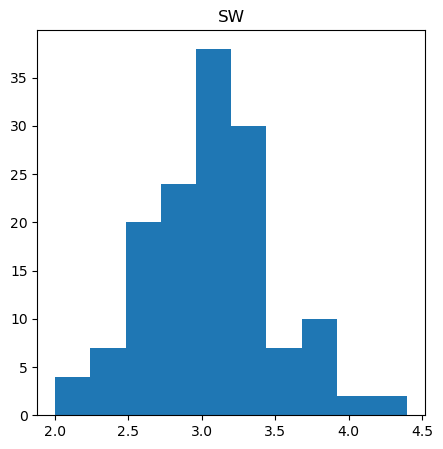

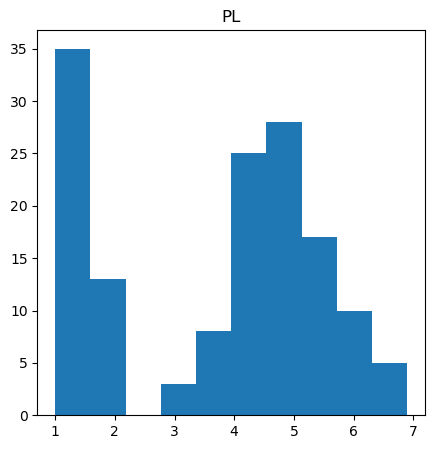

In [10]:
for i in col:
    plt.figure(figsize=(5,5))
    plt.hist(iris[i])
    plt.title(i)

In [11]:
for i in col:
    iris[i] = iris[i].fillna(iris[i].median())

In [12]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
iris.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Encoding the categorical values

In [19]:
class_cat = iris['Classification']

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
iris['Classification'] = label.fit_transform(iris['Classification'])

In [21]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Checking the correlation

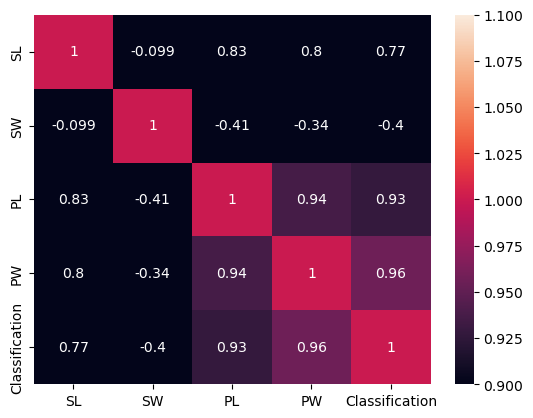

In [34]:
sns.heatmap(data = iris.corr(), annot = True, vmin= 1, vmax=1);

In [14]:
# here we can see that sl and sw are highly correlated but since here there are only 4 features we are not dropping them

### Logistic Regression

In [22]:
X = iris.drop('Classification', axis = 1)
y = iris['Classification']

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state= 24, test_size= 0.25)

In [31]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter= 200)
log.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [32]:
y_pred = log.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
print("Accuracy = ", accuracy_score(y_test, y_pred))


Accuracy =  0.9736842105263158


In [55]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 18]], dtype=int64)

<AxesSubplot:>

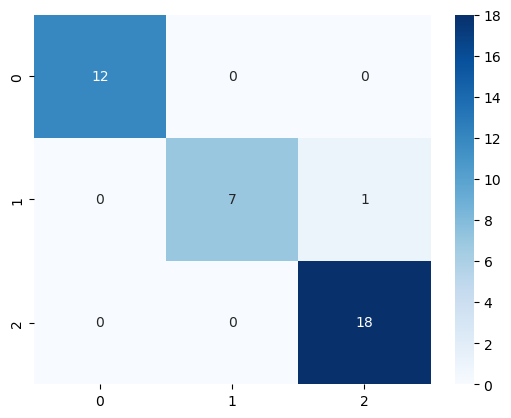

In [41]:
sns.heatmap(cf, cmap= 'Blues', annot=True)

In [39]:
# only once our model got the classification wrong for our test set

## using kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
import warnings
warnings.filterwarnings('ignore')


In [46]:
metrics = []
neighbors = np.arange(3,15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors= k, metric= 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    ypred = knn.predict(X_test)
    acc = accuracy_score(y_test, ypred)
    metrics.append(acc)
    

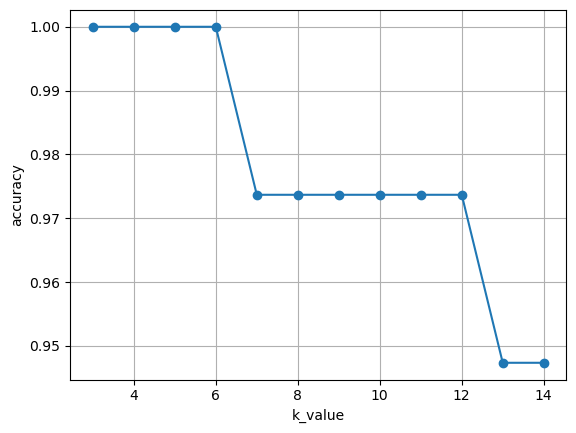

In [48]:
plt.plot(neighbors,metrics, 'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')
plt.grid()

In [49]:
# so we can see that when k value = 3,4,5,6 the model has the highest accuracy

In [51]:
knn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p = 2)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)

In [53]:
print("Accuracy = ", accuracy_score(y_test, ypred))

Accuracy =  1.0


In [54]:
confusion_matrix(y_test, ypred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 18]], dtype=int64)

## It is clear that kNN gave us a better model than logisitc regression